# News Accounts Following

Author: Jasmine Khuu

Visualization that shows the number of followers for each account and the amount that might be news-accounts. 

In [40]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# paths
folder_path = 'raw_tiktokData/following/'
news_accounts_path = 'List of News Accounts (both sections) - news accounts.csv'

#### 1. Load news accounts from CSV & extract followed usernames

In [41]:
def load_news_accounts(news_accounts_path):
    df = pd.read_csv(news_accounts_path)
    news_accounts = df['Username'].tolist()
    return news_accounts

def extract_followed_usernames(json_file_path):
    with open(json_file_path, 'r') as file:
        followed_accounts = json.load(file)
        followed_usernames = [account['UserName'] for account in followed_accounts]
    return followed_usernames

#### 2. Find overlap

In [42]:
def count_news_accounts(followed_usernames, news_accounts):
    news_accounts_followed = len(set(followed_usernames) & set(news_accounts))
    non_news_accounts_followed = len(set(followed_usernames)) - news_accounts_followed
    return news_accounts_followed, non_news_accounts_followed

news_accounts = load_news_accounts(news_accounts_path)


In [43]:
usernames = []
news_account_counts = []
non_news_account_counts = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        json_file_path = os.path.join(folder_path, file_name)
        followed_usernames = extract_followed_usernames(json_file_path)
        

        news_count, non_news_count = count_news_accounts(followed_usernames, news_accounts)
        
        usernames.append(file_name.split('.')[0])
        news_account_counts.append(news_count)
        non_news_account_counts.append(non_news_count)

#### 3. generate bar chart

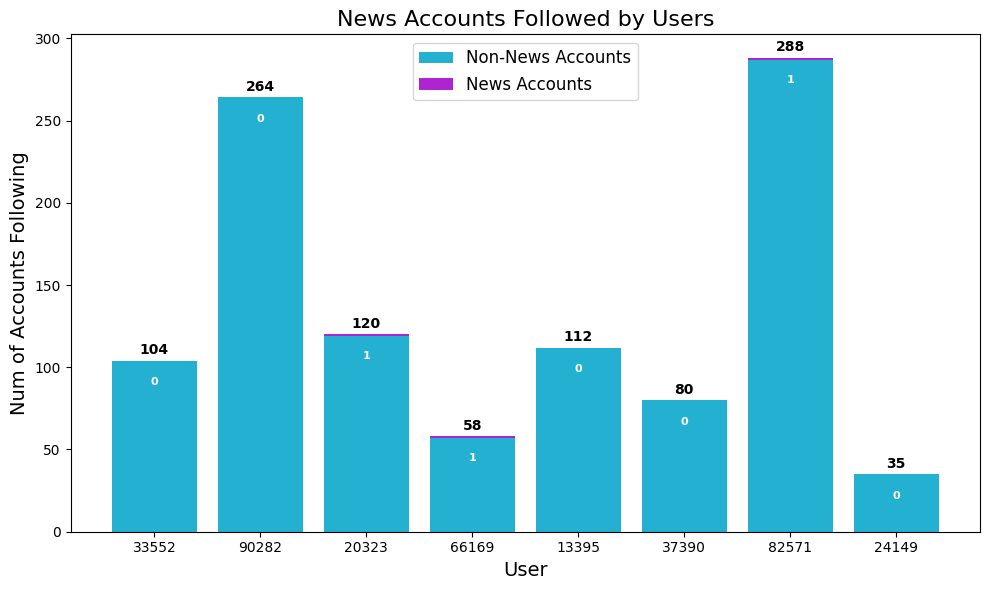

In [45]:
# Convert lists to numpy arrays for plotting
usernames = np.array(usernames)
news_account_counts = np.array(news_account_counts)
non_news_account_counts = np.array(non_news_account_counts)

# Calculate the total number of followings
total_followings = news_account_counts + non_news_account_counts

# Extract numerical portion from usernames
numerical_usernames = [username.split('_')[1] for username in usernames]

fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the bottom at zero for the first set of bars.
bottom = np.zeros(len(usernames))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
colors = ['#24b1d1', '#ae24d1']
ax.bar(numerical_usernames, non_news_account_counts, bottom=bottom, label='Non-News Accounts', color=colors[0])
ax.bar(numerical_usernames, news_account_counts, bottom=non_news_account_counts, label='News Accounts', color=colors[1])

ax.set_xlabel('User', fontsize=14)
ax.set_ylabel('Num of Accounts Following', fontsize=14)
ax.set_title('News Accounts Followed by Users', fontsize=16)

# Add value labels above the bars for total followings
y_offset = 4
for i, total in enumerate(total_followings):
    ax.text(numerical_usernames[i], total + y_offset, round(total), ha='center', weight='bold')

# Add value labels inside the bars for news accounts
y_offset = -15
for bar, count in zip(ax.patches[len(usernames):], news_account_counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + y_offset,
            round(count), ha='center', color='w', weight='bold', size=8)

ax.legend(fontsize=12)

plt.tight_layout()
plt.show()
